### Imports 

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from numpy import ravel
import matplotlib.cm as cm
from easygui import *

### Select File

In [2]:
path = fileopenbox()
img = cv.imread(path)

### Enhancing the image

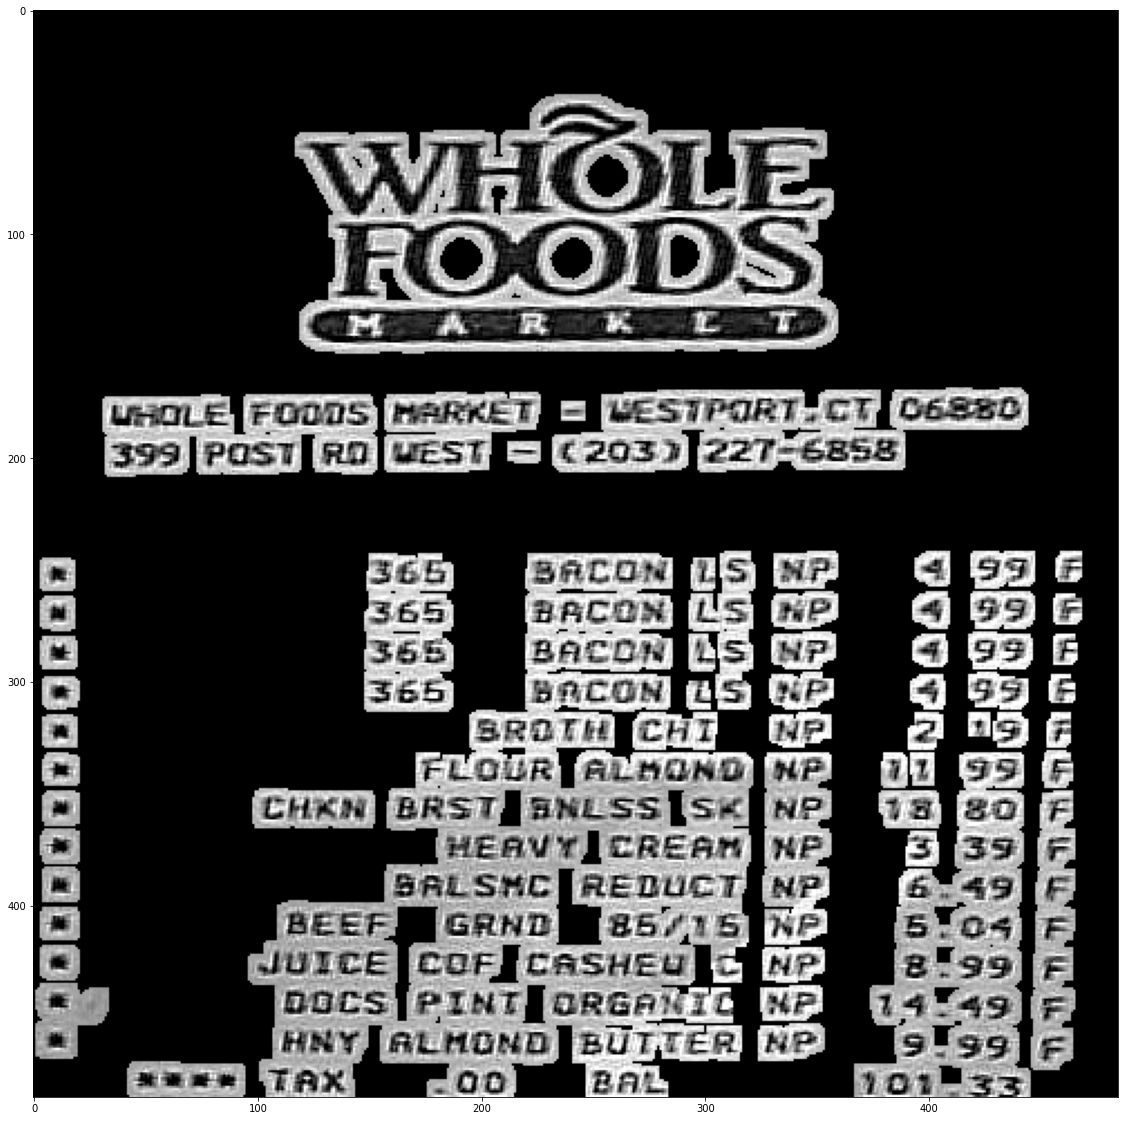

In [3]:
# Cropping
# --------

h, w = img.shape[:2]
w1 = int(w*0.015)
h1 = int(h*0.015)

cropped = img[h1:h-h1,w1:w-w1]

# Thresholding
# ------------

gray = cv.cvtColor(cropped,cv.COLOR_BGR2GRAY)
vals = gray.ravel()
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv.filter2D(gray, -1, kernel)

# minVal = cv.minMaxLoc(gray)[:1]

# minVal = int(minVal[0])
# print(minVal)

avg = np.average(gray)
print(avg)

# ret,thresh = cv.threshold(gray,avg,255,cv.THRESH_BINARY)
thresh = cv.inRange(gray,0,150)

kernel = np.ones((5,5),np.uint8)

dilated = cv.dilate(thresh,kernel,iterations=2)
# thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,13,13)

result = cv.bitwise_and(im,im,mask=dilated)



# plt.figure(figsize = (20,20))
# plt.imshow(im, cmap='gray')
# plt.show()
# plt.figure(figsize = (20,20))
# plt.imshow(gray, cmap='gray')
# plt.show()
plt.figure(figsize = (20,20))
# plt.hist(vals,bins=256,range=[0,256])
plt.imshow(result, cmap='gray')
plt.show()